This code is best exucted in the cell format of a python notebook.

In [42]:
# This code is best exucted in the cell format of a python notebook.

In [43]:
# importing all needed packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta, chisquare
import time

# The Logistic Map

The logistic map is an extremely simple non-linear, first-order difference equation; it is used to model density dependent growth. The equation is as follows: 
  $$ x_{n+1} = r \cdot x_n(1-x_n)$$

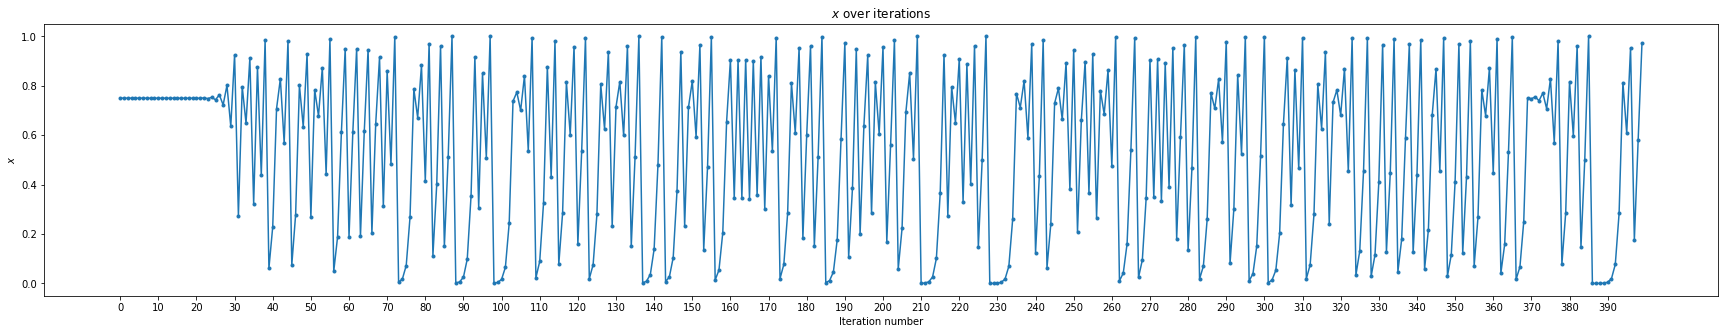

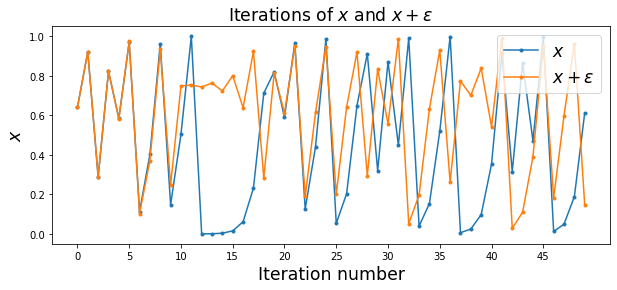

In [44]:
def generate(r, initial, iter):  # function that takes steepness parameter r, intitial value, and iteration amount and returns a list of that many iterations
    l = []
    val = r * initial * (1 - initial)
    for i in range(iter):
        l.append(val)
        val = r * val * (1 - val)
    return l


r = 4  # steepness parameter

iter = 400  # iterations for graph
l1 = generate(r, 0.7499999999, iter)  # creating one sequence

# plotting
plt.figure(figsize=(30, 5))
plt.title("$x$ over iterations")
plt.ylabel("$x$")
plt.xlabel("Iteration number")
plt.xticks(np.arange(0, iter, step=10))
plt.plot(range(iter), l1, ".-")
plt.show()


iter = 50  # iterations for graph
l2 = generate(r, 0.2, iter)  # creating two sequences
l3 = generate(r, 0.2001, iter)

# plotting
plt.figure(figsize=(10, 4))
plt.title("Iterations of $x$ and $x+\epsilon$", fontsize="xx-large")
plt.ylabel("$x$", fontsize="xx-large")
plt.xlabel("Iteration number", fontsize="xx-large")
plt.xticks(np.arange(0, iter, step=5))
plt.plot(range(iter), l2, ".-")
plt.plot(range(iter), l3, ".-")
plt.legend(["$x$", "$x+\epsilon$"], loc="upper right", fontsize="xx-large")
plt.show()


The logistic map, when r = 4, distributes values according to the beta distriution with a = 0.5 and b = 0.5 (Wikipedia):

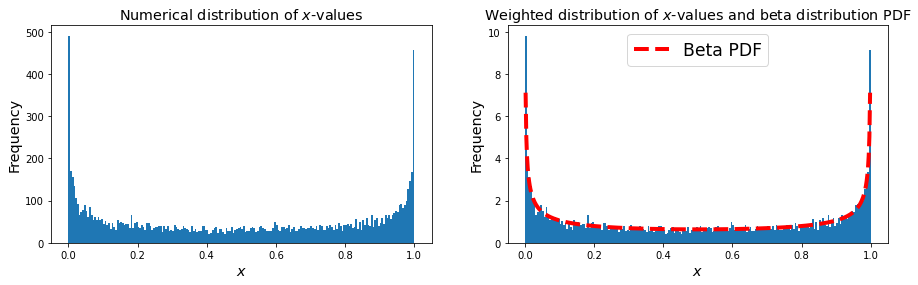

In [45]:
iter = 10000
l4 = generate(r, 0.51, iter)  # creating a sequence

# creating the plot points for the beta distribution
a = 0.5
b = 0.5
x = np.linspace(0, 1, 500)
beta_PDF = beta.pdf(x, a, b)  # alias for scipy.stats.beta

# plotting
f, [ax1, ax2] = plt.subplots(1, 2)
f.set_size_inches(15, 4)
ax1.set_title("Numerical distribution of $x$-values", fontsize="x-large")
ax1.set_xlabel("$x$", fontsize="x-large")
ax1.set_ylabel("Frequency", fontsize="x-large")
ax1.hist(l4, bins=200)
ax2.set_title("Weighted distribution of $x$-values and beta distribution PDF", fontsize="x-large")
ax2.set_xlabel("$x$", fontsize="x-large")
ax2.set_ylabel("Frequency", fontsize="x-large")
ax2.hist(l4, bins=200, density=True)
ax2.plot(x, beta_PDF, "r--", linewidth=4)
ax2.legend(["Beta PDF"], fontsize="xx-large")
plt.show()


# Creating the Generator

This generator samples the environment once (or seeds), then the subsequent outputs are done correspondingly. The input does not need to be relatively random, since we should be relying on the "intrinsic randomness" the logisitc map produces on its own.

In [46]:
# rudimentary generator to be improved
def intrinsic_gen(seed, round_amount=25):
    r = 4  # steepness parameter
    x = seed * (1 - seed)  # using the seed as the initial condition and calculating the first step
    while True:
        # yield halts the generator until next() is called on the object again
        yield round(x, round_amount)  # reducing the round_amount enough makes cycle finite
        x = r * x * (1 - x)  # iterations for subsequent steps



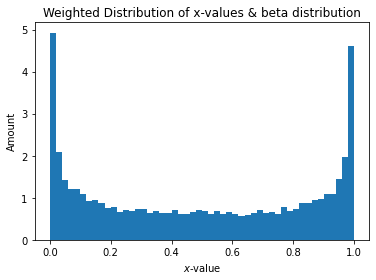

In [47]:
intrinsic_generator = intrinsic_gen(0.75)  # create a generator with seed 0.75

# standard generation method for creating a sequence
l = []
x_axis = range(10000)  # higher the range, smoother the histogram
for _ in x_axis:
    l.append(next(intrinsic_generator))  # creating a list

# plotting
plt.title("Weighted Distribution of x-values & beta distribution")
plt.ylabel("Amount")
plt.xlabel("$x$-value")
plt.hist(l, bins=50, density=True)
plt.show()


As said before, the distribution is the beta distribution attributed to the logistic map. 

This becomes an issue when trying to create a "un-biased" (uniform) random number generator. However, the realization occurs to drive the values throught the CDF to make the distribution uniform. This is the reverse of how to create a normal distribution from a uniform distrubition as demonstrated in lecture.

In [48]:
a = 0.5
b = 0.5
x = np.linspace(0, 1, 500)
beta_CDF = beta.cdf(x, a, b)

l_uniform = beta.cdf(l, a, b)  # returns a new list with beta CDF applied to each element

(A good visualization comes inspired from https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html)

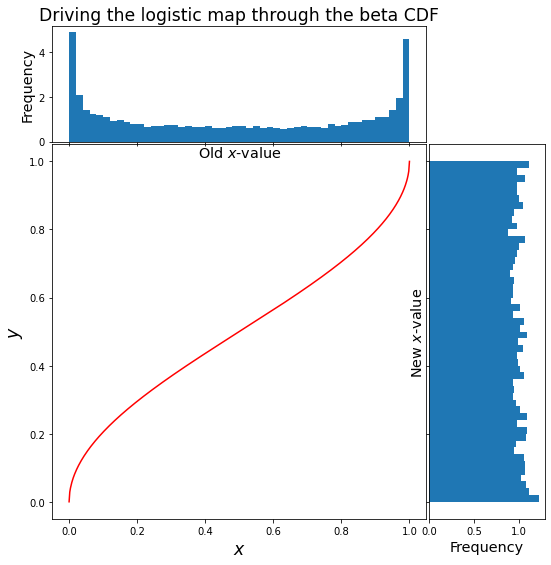

In [49]:
# based on matplotlib documentation for scatter plots with histograms
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

a = 0.5
b = 0.5
x = np.linspace(0, 1, 500)
beta_CDF = beta.cdf(x, a, b)
ax.plot(x, beta_CDF, "r")
ax.set_xlabel("$x$", fontsize="xx-large")
ax.set_ylabel("$y$", fontsize="xx-large")
ax_histx.hist(l, bins=50, density=True)
ax_histx.set_title("Driving the logistic map through the beta CDF", fontsize="xx-large")
ax_histx.set_xlabel("Old $x$-value", fontsize="x-large")
ax_histx.set_ylabel("Frequency", fontsize="x-large")
ax_histy.hist(l_uniform, bins=50, density=True, orientation="horizontal")
ax_histy.set_xlabel("Frequency", fontsize="x-large")
ax_histy.set_ylabel("New $x$-value", fontsize="x-large")

plt.show()


However, while the overall distribution is uniform, locally, the values still follow a pattern that is predictable:
* low values tend to increase and high values tend to decrease
* the values tend to stick to the fixed points 0 and 0.66

Visually:

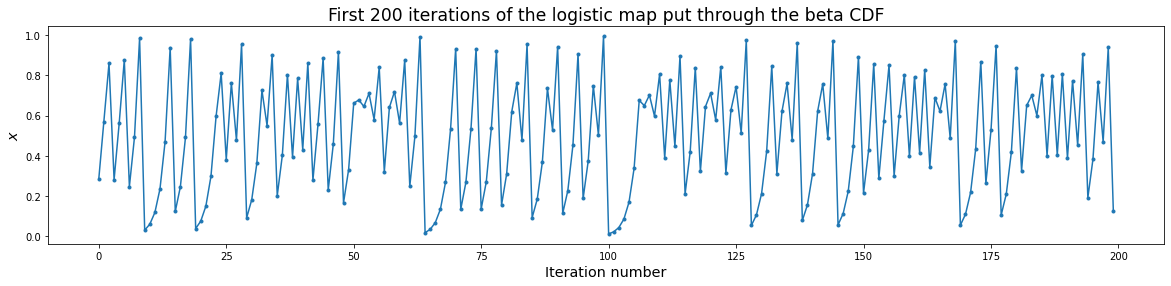

In [50]:
# plotting
lim = 200
plt.figure(figsize=(20, 4))
plt.title(f"First {lim} iterations of the logistic map put through the beta CDF", fontsize="xx-large")
plt.ylabel("$x$", fontsize="x-large")
plt.xlabel("Iteration number", fontsize="x-large")
plt.plot(x_axis[:lim], l_uniform[:lim], ".-")
plt.show()


A solution could be to take multiple iterations before outputting a value. This may make sense because chaos is reliant on sensative dependance on initial conditions after a series of iterations (strectches and folds). 

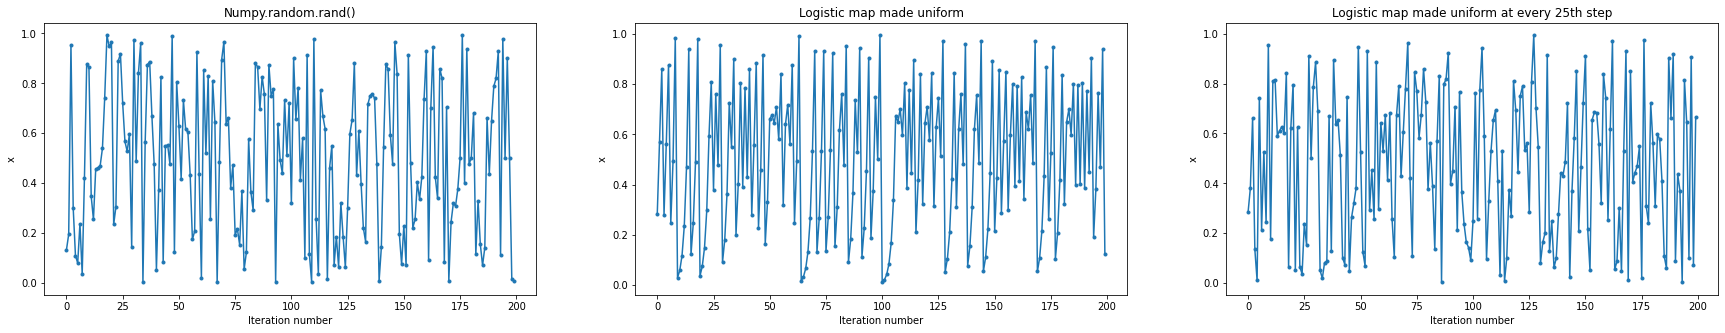

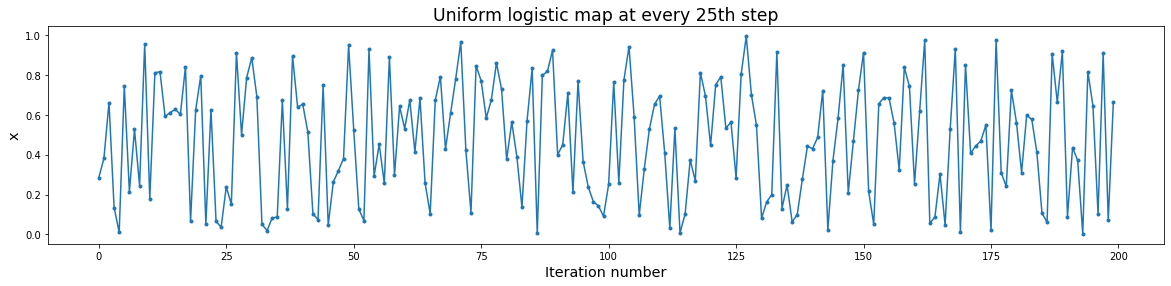

In [51]:
l_np_uniform = [np.random.rand() for i in range(200)]  # creating a numpy uniform sequence for comparison

n = 25
l_n_steps = [l_uniform[i] for i in range(len(l_uniform)) if i % n == 0]  # creating the sequence with gaps between yields

# plotting
f, [ax1, ax2, ax3] = plt.subplots(1, 3)
f.set_size_inches(30, 5)
ax1.set_title("Numpy.random.rand()")
ax1.set_xlabel("Iteration number")
ax1.set_ylabel("x")
ax1.plot(range(200), l_np_uniform, ".-")
ax2.set_title("Logistic map made uniform")
ax2.set_xlabel("Iteration number")
ax2.set_ylabel("x")
ax2.plot(x_axis[:200], l_uniform[:200], ".-")
ax3.set_title(f"Logistic map made uniform at every {n}th step")
ax3.set_xlabel("Iteration number")
ax3.set_ylabel("x")
ax3.plot(x_axis[:200], l_n_steps[:200], ".-")
plt.show()

# plotting for just the uniform sequence with an iteration gap
plt.figure(figsize=(20, 4))
plt.title(f"Uniform logistic map at every {n}th step", fontsize="xx-large")
plt.ylabel("x", fontsize="x-large")
plt.xlabel("Iteration number", fontsize="x-large")
plt.plot(x_axis[:200], l_n_steps[:200], ".-")
plt.show()


Visually, numpy random and the nth step iterations appear more similar than numpy random to the regular logistic map iterations

Interestingly, the nth step density is still uniform:

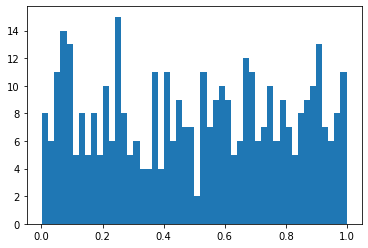

This sequence length =  400


In [52]:
plt.hist(l_n_steps, bins=50)  # histogram of iteration gap sequence
plt.show()
print('This sequence length = ', len(l_n_steps))


In total, this intrinsic generator can be written as:

In [53]:
def intrinsic_gen(seed):
    r = 4  # set steepness parameter
    iter_amount = 100  # set iteration amounts per yield
    a = 0.5
    b = 0.5
    x = seed * (1 - seed)  # using the seed as the initial condition and calculating the first step
    while True:
        for _ in range(iter_amount):  # loop to space out each yield
            x = r * x * (1 - x)
        yield beta.cdf(x, a, b)  # only apply beta CDF after doing regular iterations


# standrad generation method
intrinsic_generator = intrinsic_gen(0.499)
l = []
x_axis = range(25000)  # higher the range, smoother the histogram
for _ in x_axis:
    l.append(next(intrinsic_generator))  # creating a list



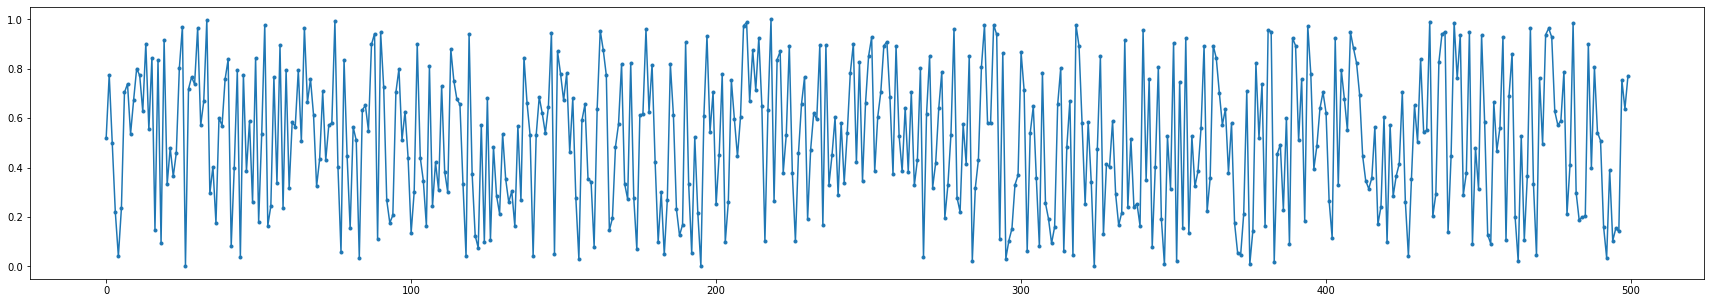

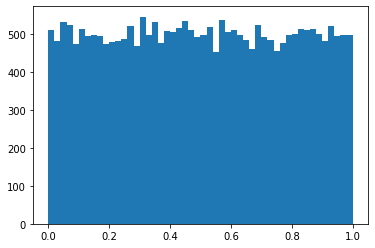

In [54]:
# plotting
plt.figure(figsize=(30, 5))
plt.plot(range(500), l[:500], ".-")
plt.figure()
plt.hist(l, bins=50)
plt.show()


Now this appears random

Here is another way to code the generator (as a class so next() can be called as a method)

In [55]:
# The generator


def intrin_gen(seed, iter_amount=20):  # iteration amounts per yield (changes statistical tests)
    r = 4  # set steepness parameter
    a = 0.5  # params for beta distribution
    b = 0.5
    x = seed * (1 - seed)  # using the seed as the initial condition and calculating the first step
    while True:  # produce numbers indefinitely
        for _ in range(iter_amount):  # space out each yield
            x = r * x * (1 - x)  # logistic map equation
        yield beta.cdf(x, a, b)  # only apply beta CDF after doing regular iterations


# creating a class that uses a method to call next() on the generator object
class intrinsic_generator:
    def __init__(self, seed=None, iter_amount=None):
        # four possible setups for the intrinsic generator given optional seed and iter_amount
        if seed:
            if iter_amount:
                self.intrin_gen = intrin_gen(seed, iter_amount)
            else:
                self.intrin_gen = intrin_gen(seed)
        else:
            if iter_amount:
                self.intrin_gen = intrin_gen(seed_init(), iter_amount)
            else:
                self.intrin_gen = intrin_gen(seed_init())

    def gen(self):  # method that will call next() on the generator
        return next(self.intrin_gen)


# seed function
def seed_init():
    time_current = time.time()
    time_current = (time_current * 1000 % 1)  # returns number of centiseconds since last centisecond (from 0 to 1)
    return time_current



# A Continuous Generator

Testing the viability of generating a random number with the logistic map by sampling an environment (or computer state) each output call.

(Continuous generator is not a technical term from anywhere, but a intuitive one to come up with. Intrinsic is a technical term though)

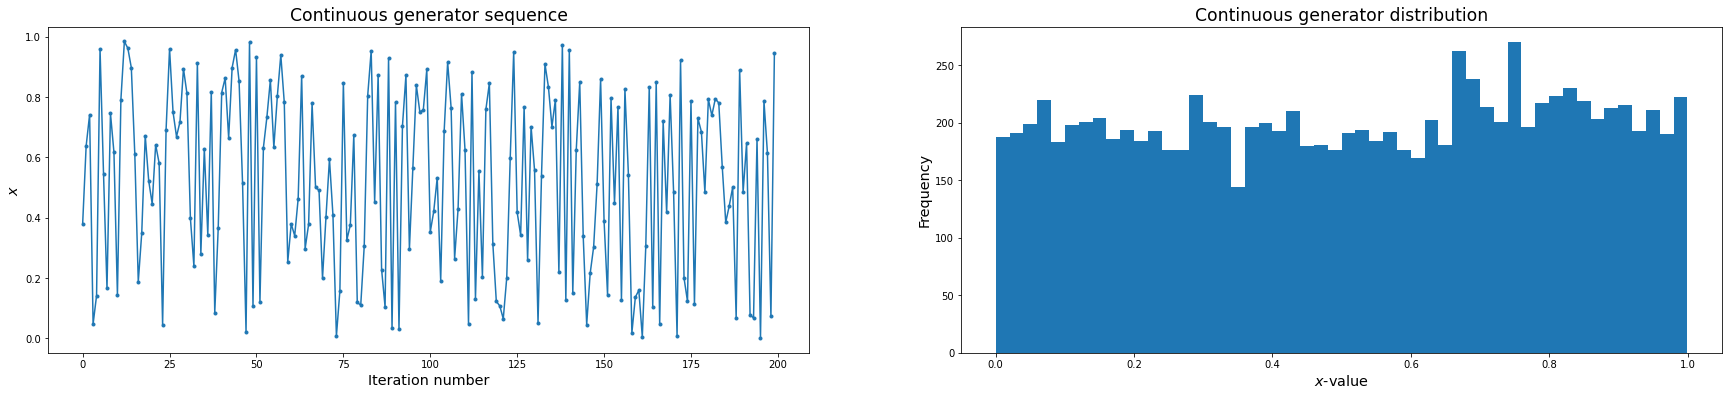

In [56]:
# seed function
def seed_init():
    time_current = time.time()
    time_current = (time_current * 100 % 1)  # returns number of milliseconds since last centisecond (from 0 to 1)
    return time_current


def continious_gen(seed):
    r = 4  # set steepness parameter
    iter_amount = 10  # set iteration amounts per yield
    a = 0.5
    b = 0.5
    x = seed * (1 - seed)  # using the seed as the initial condition and calculating the first step
    for _ in range(iter_amount):  # loop to space out each yield
        x = r * x * (1 - x)
    return beta.cdf(x, a, b)  # only apply beta CDF after doing regular iterations


# standard generation method
l = []
x_axis = range(10000)
for _ in x_axis:
    l.append((continious_gen(seed_init())))  # creating a list

# plotting
f, [ax1, ax2] = plt.subplots(1, 2)
f.set_size_inches(30, 6)
ax1.set_title(f"Continuous generator sequence", fontsize="xx-large")
ax1.set_ylabel("$x$", fontsize="x-large")
ax1.set_xlabel("Iteration number", fontsize="x-large")
ax1.plot(range(200), l[:200], ".-")
ax2.set_title(f"Continuous generator distribution", fontsize="xx-large")
ax2.set_ylabel("Frequency", fontsize="x-large")
ax2.set_xlabel("$x$-value", fontsize="x-large")
ax2.hist(l, bins=50)
plt.show()


This appears to be uniform and unpredictable, just like the former intrnsic generator. Nevertheless, it seems like introducing this middle step of sampling time for each output is redundant.

# Statistical Tests


## Chi-Squared Goodness of Fit




A chi-squared test on the uniformity of the distributions.The expected value equals the length of the sequence divided by the number of bins

In [57]:
# standard generation method
intrin = intrinsic_generator()

l = []
x_axis = range(10000)  # higher the range, smoother the histogram
for _ in x_axis:
    l.append(intrin.gen())  # creating a list

In [58]:
# chi-sqaure test
def calc_chi_squared_1D(sequence, bins_amount):
    n, _ = np.histogram(sequence, bins=bins_amount)  # binning the observed sequence values
    e = len(sequence) / bins_amount  # calculating the expected value
    return round(chisquare(n, e)[0], 5)  # returning scipy.stats.chisquare


bins_amount = 15  # DOF = bins_amount - 1
chi_squared = calc_chi_squared_1D(l, bins_amount)
print(f"The chi-square fitness for {bins_amount} degrees of freedom equals {chi_squared}.")


The chi-square fitness for 15 degrees of freedom equals 17.45.


Chi squared test done multiple times

In [59]:
chi_squared_list = []  # stores each trials for chi-square fitness
seq_len = 100

for _ in range(50):  # increasing value will make more accurate, but 50 is already accurate
    l_repeat = []  # stores the temporary random sequence
    intrin = intrinsic_generator()  # new seed for the generator
    for _ in range(seq_len):  # length of each sequence
        l_repeat.append(intrin.gen())  # creating a list
    bins_amount = 15
    chi_squared_list.append(calc_chi_squared_1D(l_repeat, bins_amount))



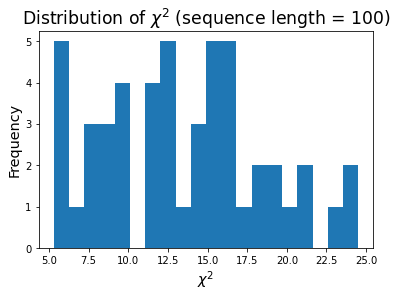

13.526


In [60]:
# plotting
plt.title(f"Distribution of $\chi^2$ (sequence length = {seq_len})", fontsize="xx-large")
plt.xlabel("$\chi^2$", fontsize="x-large")
plt.ylabel("Frequency", fontsize="x-large")
plt.hist(chi_squared_list, bins=20)
plt.show()

print(np.mean(chi_squared_list))  # for seq_len trials, the average chi-square


This code explores the idea of evaluating the chi-square fitness test on the "global" sequence and "local" sub-sequences. A truly random generator will be uniform locally just as it is globally.

## 1D Random Walk

In [61]:
def randomwalk(inputlist):  # input: a list of values such as those generated by a random number generator
    dist = 0
    for item in inputlist:
        dist = dist + item
    return dist


In [62]:
def randomwalk_intrinsic(walklen):  # input: number of "steps" in desire walk
    walklist = np.zeros(walklen)

    for i in range(len(walklist)):
        walklist[i] = intrin.gen() - 0.5  # every step is between -0.5 and 0.5

    return randomwalk(walklist)



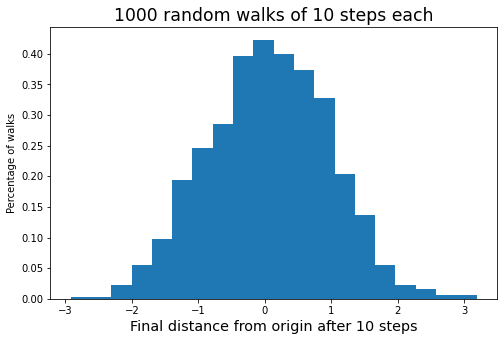

In [63]:
intrinwalks = []
continwalks = []

walknum = 1000  # number of walks
walklen = 10  # number of steps per walk

for i in range(walknum):
    intrinwalks.append(randomwalk_intrinsic(walklen))

plt.figure(figsize=(8, 5))

plt.hist(intrinwalks, bins=20, density=True)
plt.title("{0:0.0f} random walks of {1:0.0f} steps each".format(walknum, walklen), fontsize="xx-large")
plt.xlabel("Final distance from origin after {0:0.0f} steps".format(walklen), fontsize="x-large")
plt.ylabel("Percentage of walks")
plt.show()


## Serial Test:

The serial test runs chi-square on multi-dimensional bins

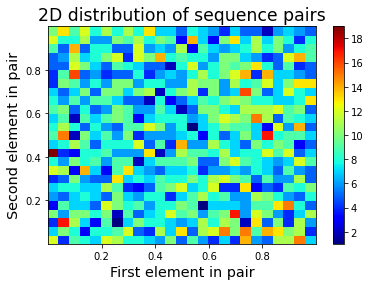

In [64]:
# turns list of iterations into two coordinates
x_cord = []
y_cord = []
i = 0
while i < len(l) - 2:
    x_cord.append(l[i])
    i += 1
    y_cord.append(l[i])
    i += 1

# plotting the coordinaates
plt.title("2D distribution of sequence pairs", fontsize="xx-large")
plt.hist2d(x_cord, y_cord, bins=25, cmap="jet")
plt.xlabel("First element in pair", fontsize="x-large")
plt.ylabel("Second element in pair", fontsize="x-large")
plt.colorbar()
plt.show()


Another visualization in 3D space (based on www.matplotlib.org/stable/gallery/mplot3d/hist3d.html)


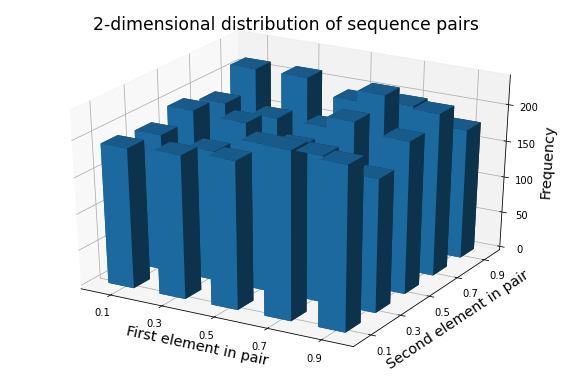

In [65]:
# based on the matplotlib 3D plot example
# http://www.matplotlib.org/stable/gallery/mplot3d/hist3d.html

bins_amount = 5
hist, x_edge, y_edge = np.histogram2d(x_cord, y_cord, bins=bins_amount, range=[[0, 1], [0, 1]])  # create histogram bins

# setting the x and y coordinate labels
xpos, ypos = np.meshgrid(x_edge[:-1] + 0.05, y_edge[:-1] + 0.05, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()

width = depth = 0.1  # x and y dimensions of bars
bottom = 0  # bottom z-coordinate of bar
top = hist.ravel()  # top z-coordinate of bar

# plotting
fig = plt.figure()
fig.set_size_inches(10, 6.66)
ax = fig.add_subplot(projection="3d")
ax.bar3d(xpos, ypos, bottom, width, depth, top, color=None)  # bar3d
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9])
ax.set_title("2-dimensional distribution of sequence pairs", fontsize="xx-large")
ax.set_xlabel("First element in pair", fontsize="x-large")
ax.set_ylabel("Second element in pair", fontsize="x-large")
ax.set_zlabel("Frequency", fontsize="x-large")
plt.show()


If it's uniform, we expect the distribution of the pairs to also be uniform. Visually, this seems true.

We could run a chi-squared test on the expected value in a bin ($ \frac{t}{2} * \frac{1}{bins^2}$) compared to the observed amount.

Chi-squared:
- sum(power(n-e, 2)/e)
- n = observed number (now it becomes the length of the origional sequence divded by 2)
- e = expected
- Where the degrees of freedom = $bins^2$


In [66]:
# manual chi-square calculation
n = []
for i in range(len(hist)):
    n.extend(hist[i])
e = len(l) / (2 * bins_amount ** 2)


chi_squared = 0
for val in n:
    chi_squared += (val - e) ** 2 / e

# results
print(chi_squared)
print("Degrees of freedom: ", bins_amount ** 2 - 1)


36.585
Degrees of freedom:  24


## Correlation


The correlation between two distinct random sequences can test the randomness of the genrator

In [67]:
# standard generation method
intrin = intrinsic_generator()
intrin2 = intrinsic_generator()

l = []
l2 = []
x_axis = range(10000)
for _ in x_axis:
    l.append(intrin.gen())  # creating list 1
    l2.append(intrin2.gen())  # creating list 2

print(np.corrcoef(l, l2))


[[1.         0.00375614]
 [0.00375614 1.        ]]


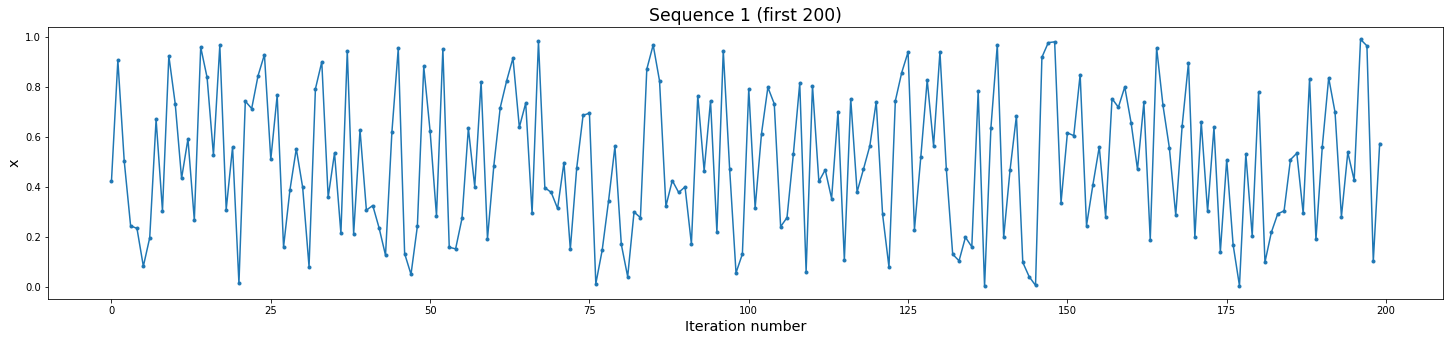

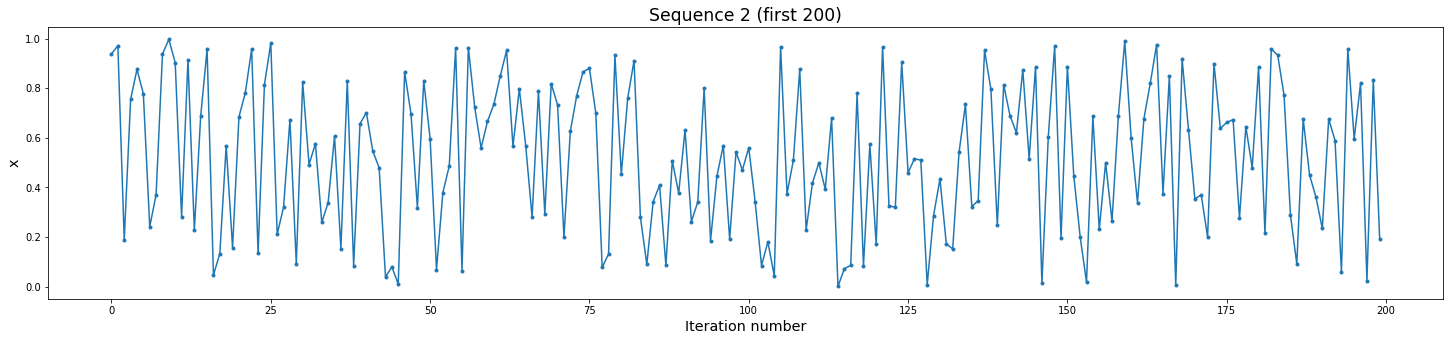

In [68]:
plt.figure(figsize=(25, 5))
plt.title(f"Sequence 1 (first 200)", fontsize="xx-large")
plt.ylabel("x", fontsize="x-large")
plt.xlabel("Iteration number", fontsize="x-large")
plt.plot(x_axis[:200], l[:200], ".-")
plt.figure(figsize=(25, 5))
plt.title(f"Sequence 2 (first 200)", fontsize="xx-large")
plt.ylabel("x", fontsize="x-large")
plt.xlabel("Iteration number", fontsize="x-large")
plt.plot(x_axis[:200], l2[:200], ".-")
plt.show()


Another interesting visualization (that was come across independently in this project) is the correlation within one sequence—more specifically, when plotting the current values (xn) against the next values (xn+1).This is done for a series of generators with different iteration amounts (or iteration gaps) before yielding an output:


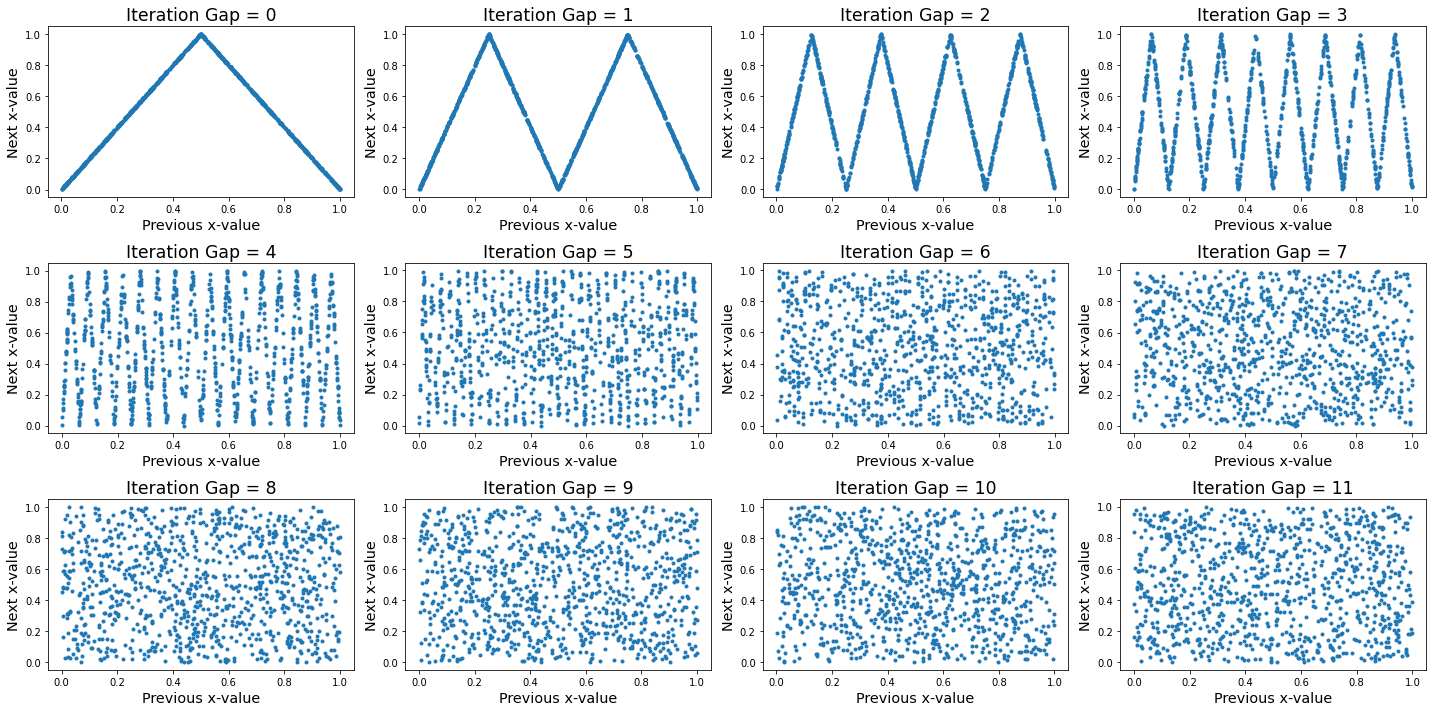

In [69]:
def before_after_scatter(generator_iter_amount):
    # standard generation method for different iteration gaps
    intrin = intrinsic_generator(seed=0.4, iter_amount=generator_iter_amount)
    l = []
    x_axis = range(1000)
    for _ in x_axis:
        l.append(intrin.gen())  # creating a list

    # creating a list of next values and the previous values from the generated sequence
    befores = []
    afters = []
    for i in range(1, len(l)):
        befores.append(l[i - 1])
        afters.append(l[i])

    return befores, afters


# plotting
f, [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]] = plt.subplots(3, 4)
f.set_size_inches(20, 10)


def plot_axis(iter_amount, axis):
    befores, afters = before_after_scatter(iter_amount)
    axis.set_title(f"Iteration Gap = {iter_amount-1}", fontsize="xx-large")
    axis.plot(befores, afters, ".")
    axis.set_xlabel("Previous x-value", fontsize="x-large")
    axis.set_ylabel("Next x-value", fontsize="x-large")


for (iter_amount, axis) in zip(range(1, 16), [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]):
    plot_axis(iter_amount, axis)

plt.tight_layout()
plt.show()


## Effects of Seeding:

The following graphs demonstrate how different sequences may start off similar when originating from seeds of very minute differences.

In [70]:
def intrinsic_gen(seed):
    r = 4
    iter_amount = 1
    a = 0.5
    b = 0.5
    x = seed * (1 - seed)
    while True:
        for _ in range(iter_amount):
            x = r * x * (1 - x)
        yield beta.cdf(x, a, b)


def compare_generators(baseline_seed, delta_seed, output_length=100, graphresults=False, threshold=0):
    generator_baseline = intrinsic_gen(baseline_seed)
    generator_delta = intrinsic_gen(baseline_seed + delta_seed)

    xarr = []
    yarr = []
    thresholdcross = output_length
    threshold_set = False

    for i in range(output_length):
        output_baseline = next(generator_baseline)
        output_delta = next(generator_delta)
        yarr.append(np.abs(output_delta - output_baseline))
        xarr.append(i + 1)
        if (np.abs(output_delta - output_baseline) > threshold and threshold_set == False):
            thresholdcross = i
            threshold_set = True

    if graphresults:
        plt.plot(xarr, yarr)
        plt.title(f"Difference between generator with seed {baseline_seed} and generator with seed {baseline_seed + delta_seed}")
        plt.xlabel("Number of iterations $n$")
        plt.ylabel("Difference between $n$th outputs")
        plt.show()

    return thresholdcross



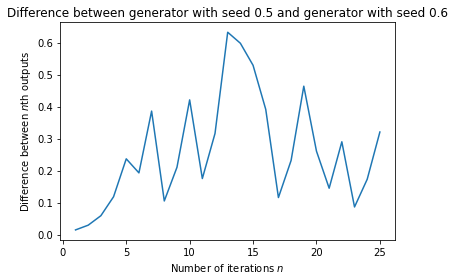

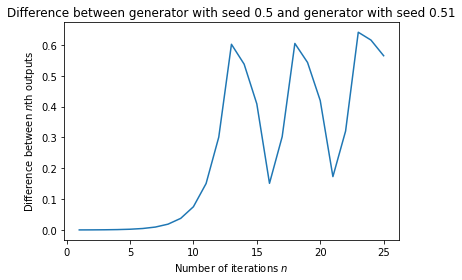

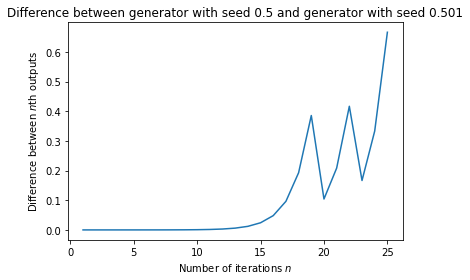

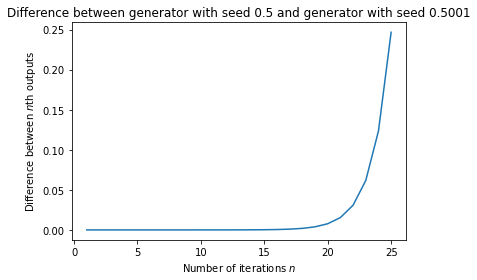

In [71]:
plt.rcParams["figure.figsize"] = 6, 4

compare_generators(0.5, 0.1, output_length=25, threshold=0.2, graphresults=True)
compare_generators(0.5, 0.01, output_length=25, threshold=0.2, graphresults=True)
compare_generators(0.5, 0.001, output_length=25, threshold=0.2, graphresults=True)
compare_generators(0.5, 0.0001, output_length=25, threshold=0.2, graphresults=True)
plt.show()


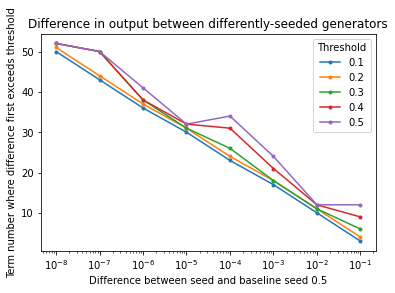

In [72]:
xarr = []
yarr1 = []
yarr2 = []
yarr3 = []
yarr4 = []
yarr5 = []

for i in range(1, 9):
    seed_diff = 1 / (10 ** i)
    xarr.append(seed_diff)
    yarr1.append(compare_generators(0.5, seed_diff, output_length=(100 * i), threshold=0.1))
    yarr2.append(compare_generators(0.5, seed_diff, output_length=(100 * i), threshold=0.2))
    yarr3.append(compare_generators(0.5, seed_diff, output_length=(100 * i), threshold=0.3))
    yarr4.append(compare_generators(0.5, seed_diff, output_length=(100 * i), threshold=0.4))
    yarr5.append(compare_generators(0.5, seed_diff, output_length=(100 * i), threshold=0.5))

plt.plot(xarr, yarr1, marker=".", label="0.1")
plt.plot(xarr, yarr2, marker=".", label="0.2")
plt.plot(xarr, yarr3, marker=".", label="0.3")
plt.plot(xarr, yarr4, marker=".", label="0.4")
plt.plot(xarr, yarr5, marker=".", label="0.5")

plt.rcParams["figure.figsize"] = 8, 4
plt.xscale("log")
plt.legend(loc="upper right", title="Threshold")
plt.title("Difference in output between differently-seeded generators")
plt.xlabel("Difference between seed and baseline seed 0.5")
plt.ylabel("Term number where difference first exceeds threshold")
plt.show()


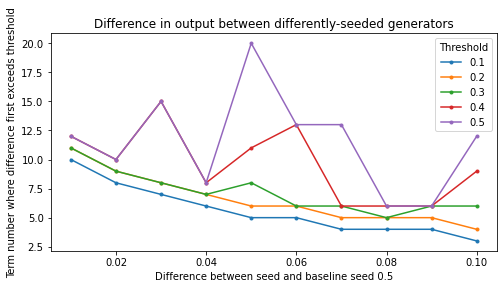

In [73]:
xarr = []
yarr1 = []
yarr2 = []
yarr3 = []
yarr4 = []
yarr5 = []

for i in range(1, 11):
    seed_diff = 0.01 * i
    xarr.append(seed_diff)
    yarr1.append(compare_generators(0.5, seed_diff, output_length=(100), threshold=0.1))
    yarr2.append(compare_generators(0.5, seed_diff, output_length=(100), threshold=0.2))
    yarr3.append(compare_generators(0.5, seed_diff, output_length=(100), threshold=0.3))
    yarr4.append(compare_generators(0.5, seed_diff, output_length=(100), threshold=0.4))
    yarr5.append(compare_generators(0.5, seed_diff, output_length=(100), threshold=0.5))

plt.plot(xarr, yarr1, marker=".", label="0.1")
plt.plot(xarr, yarr2, marker=".", label="0.2")
plt.plot(xarr, yarr3, marker=".", label="0.3")
plt.plot(xarr, yarr4, marker=".", label="0.4")
plt.plot(xarr, yarr5, marker=".", label="0.5")

plt.rcParams["figure.figsize"] = 8, 4
plt.xscale("linear")
plt.legend(loc="upper right", title="Threshold")
plt.title("Difference in output between differently-seeded generators")
plt.xlabel("Difference between seed and baseline seed 0.5")
plt.ylabel("Term number where difference first exceeds threshold")
plt.show()
